# Assignment 1. Sentiment analysis using Naive Bayes classifier

Full instructions on completion of this assignment can be found in Canvas.

## 1. Theoretical part

### Naive Bayes Classifier, the Bernoulli model

Let $V$ be a set of words $\{v_1 ,v_2 ,...,v_{|V|} \}$ (dictionary). In the Bernoulli model for each class $c_j$ we look at random $|V|$-dimentional variable ($\beta_{1j}, \beta_{2j}, ..., \beta_{|V|j}$) with independent components. Component $\beta_i$ corresponds to $v_i$ word in the dictionary and has Bernoulli distribution with success probability $s_{ij}$. In other words, for each class $c_j$ we have our own set of $|V|$ asymmetrical coins.

In order to generate a document (words collection) we need to flip all these coins and choose those words from the dictionary that appeared with "heads". 

Documents that differ only with the word order or/and frequencies should be considered equal.

In each of the following questions write the formula in the **general form** first, then its **estimation on the train set** using **additive smoothing** (Laplace smoothing).

a) Find $P(v_i \in d | c_j)$ -- probability to see the word $v_i$ from the dictionary $V$ in a random document of $c_j$ class

b) Find $P(d=(k_1,k_2,...,k_{|V|}) | c_j)$ – probability of document $d$ from class $c_j$ to comprise $k_1, k_2, ..., k_{|V|}$ entries of words $v_1, v_2, ..., v_{|V|}$. Use the naive assumption that the features are independent.


c) Find $P(c_j|d)$ -- probability that document $d$ belongs to class $c_j$. Use Bayes’ rule.

d) Which class $c_j$ will be assigned to document $d$, given the $P(c_j)$ and $P(d|c_j)$? How to evaluate the error probability?

a)$P(c_j|d)=\{0,1\}$
so
$P(v_i \in d | c_j)=\frac{\sum^{|D|}_{t=1}\beta_{i,t}P(c_j|d)}{\sum^{|D|}_{t=1}P(c_j|d)}$

with Laplace smoothing

$P(v_i \in d | c_j)=\frac{1+\sum^{|D|}_{t=1}\beta_{i,t}P(c_j|d)}{2+\sum^{|D|}{t=1}P(c_j|d)}$

b) $P(v_i \in d | c_j)=\prod^{|V|}_{k=1}\beta_{ik}P(v_k|c_j)+(1-\beta_{ik}(1-P(v_k|c_j)))$

c) Bayes rule is $frac{P(c_j)P(d_i|cj)}{P(d_i)}$ then

$P(c_j|d_i)=P(c_j)P(d_i|cj)$

d)
$class=argmax_{c\in C}P(c|d)=argmax_{c\in C}P(c)P(d|c)$

and $P(c)$ is aprior probability $c_j$ it's equal to $\frac{n_{c_j}}{n}$ where $n_j$ number of docs of j class and n is total number of docs

### Multinomial Naive Bayes classifier
For each class $c_j$ we consider a random variable $W$ with multinominal distribution $Mult(r_{1j} ,..., r_{|V|j})$ (a dice with $|V|$ faces, probability of $i^{th}$ face is $r_{ij}$) and a random variable $N$ with the $P(N)$ distribution, $N \in [1, \infty)$.

For each document we first sample its length $n\sim P(N)$ than we sample $n$ times each word $w\sim Mutl(r_{1j},..., r_{|V|j} )$: $n$ times we roll the unsymmetrical dice with $V$ faces. 


We assume that document length does not depend on class: 
$$
P(N|c_j )=P(N)
$$

In this case we may ignore the length as well as the document probability $P(d)$. Documents that differ only with the word order are considered equal

Questions a)–d): same as for the Bernoulli model

a)$P(c_j|d)=\{0,1\}$
so
$P(w_i \in d | c_j)=\frac{\sum^{|D|}_{t=1}\beta_{i,t}P(c_j|d)}{\sum^{|D|}_{t=1}P(c_j|d)}$

with Laplace smoothing

$P(w_i \in d | c_j)=\frac{1+\sum_{i=1}^{|D|}r_{ki}p(c_j|d_i)}{|V|+\sum^{|D|}_{i=1}P(c_j|d)}$

b)$P(w_i \in d | c_j)=\frac{|N_i|!}{\prod_{k=1}^{|V|}N_{ik}!}\prod_{k=1}^|V|P(w_k|c_j)$

c) $log(P(c_j|d_i))=log(P(c_j))+\sum_{k=1}^{|V|}N_{ik}log(P(w_i|c_j))$

d)$class=argmax_{c\in C}log(P(c))+log(P(d|c))$

## 2. Practical part

_**NB**: Classifiers should be **compatible with python 3.7** and **independent of third-party (non-standard) libraries**. We recommend to install Anaconda and to create an environment, containing python 3.7 only:_

In [ ]:
!conda create -n a1 python=3.7 --yes

In [1]:
!source activate a1

"source" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Implement Bernoulli Naive Bayes and Multinomial Naive Bayes classifiers. Evaluate them on FILIMDB Dataset ([http://github.com/slangtech/filimdb_evaluation](http://github.com/slangtech/filimdb\_evaluation)). Use accuracy to compare their performance on train / dev / test sets.

In [2]:
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter, defaultdict
import codecs
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
from time import time
%matplotlib inline

In [3]:
#for read files
def text_readers(path):
    file=codecs.open(path,'r','utf_8_sig')
    text=file.read()
    file.close()
    text=text.split('\n')
    text=text[:-1]
    return text

In [4]:
train_labels=pd.read_csv('FILIMDB/train.labels',header=None)
dev_labels=pd.read_csv('FILIMDB/dev.labels',header=None)
dev_labels_b=pd.read_csv('FILIMDB/dev-b.labels',header=None)

In [5]:
train=text_readers('FILIMDB/train.texts')
dev=text_readers('FILIMDB/dev.texts')
test=text_readers('FILIMDB/test.texts')
dev_b=text_readers('FILIMDB/dev-b.texts')
test_b=text_readers('FILIMDB/test-b.texts')

1. Split train data into two lists: positives and negative reviews. What is the min/max/avg/median length of negative reviews?

In [6]:
#separeted by negative and positive reviews
print(np.unique(train_labels,return_counts=True))
separated = [[x for x, t in zip(np.array(train), np.array(train_labels)) if t == c] for c in np.unique(train_labels)]
negative_length=[len(i) for i in separated[0]]

(array(['neg', 'pos'], dtype=object), array([7480, 7520], dtype=int64))


In [7]:
minimum_length=np.min(negative_length)
maximum_length=np.max(negative_length)
avg_length=np.mean(negative_length)
median_length=np.median(negative_length)
print('min: ',minimum_length,'max: ',maximum_length,'avg: ',avg_length,'median: ',median_length)

min:  52 max:  8969 avg:  1316.3576203208556 median:  981.0


2. Preprocess the data. Convert texts to lowercase, surround non-alphanumeric symbols with spaces. 

_(Be careful: you may come across non-latin characters, e.g. **é** in the word "cliché". However, keeping this word is quite beneficial: word "cliché" serves as a good feature for negative reviews)._

In [8]:
#function for surround non-alphanumeric symbols with spaces
def surround_non_symbols(word):
    new_word=''
    list_letters=list(word)    
    for symbol in list_letters:
        if symbol in set(string.punctuation):
            symbol=' '+symbol+' '
        else:
            symbol=symbol
        new_word+=symbol
    return new_word
    

In [9]:
#preprocessing function,make letters lower, also can delete punktuations an other symbols
translator = str.maketrans('', '', string.punctuation)
def preprocess_text(Text,punct=False,figures=False):
    result=[]
    for sentense in Text:
        string=(sentense.lower())
        string = " ".join([surround_non_symbols(word) for word in string.split()])
        clear_sentence=" ".join(string.split())
        if punct==True:
            clear_sentence=clear_sentence.translate(translator)
        if figures==True:
            clear_sentence=re.sub(r'\d+', '', clear_sentence)
        result.append(clear_sentence)
    return result


In [10]:
preprocessed_train = preprocess_text(train,False,False)

## Before

In [11]:
train[25]

"This movie is traditional bollywood fare as far as the star power, sentimentality and love triangle of emotions. What really bothered me about this movie was the makers' absurd notion of surrogate mother. A whore who conceives a child with someone after have sex with the man (of the family desiring a child) is not a surrogate mother. Neither is she a good candidate for a surrogate mother. I have seen Indian movies and television shows that made 10 to 15 years ago that dealt with this issue more intelligently. The whole concept of the movie is ridiculous and absolutely implausible. I realize that most bollywood movies aren't meant to be plausible, but they don't pretend to be either. This movie wants us to emote along with the characters, but this can't done with such a ridiculous, contrived conflict. I would have expected better from Abbas and Mustan."

## After

In [12]:
preprocessed_train[25]

"this movie is traditional bollywood fare as far as the star power , sentimentality and love triangle of emotions . what really bothered me about this movie was the makers ' absurd notion of surrogate mother . a whore who conceives a child with someone after have sex with the man ( of the family desiring a child ) is not a surrogate mother . neither is she a good candidate for a surrogate mother . i have seen indian movies and television shows that made 10 to 15 years ago that dealt with this issue more intelligently . the whole concept of the movie is ridiculous and absolutely implausible . i realize that most bollywood movies aren ' t meant to be plausible , but they don ' t pretend to be either . this movie wants us to emote along with the characters , but this can ' t done with such a ridiculous , contrived conflict . i would have expected better from abbas and mustan ."

In [13]:
#Now repeat preprocessing in order to delete punctuation and etc.
# 1st iteration of preprocessing just to show for task with spaces around non-alphabit symbols
preprocessed_train = preprocess_text(train,True,False)
preprocessed_dev = preprocess_text(dev,True,False)
preprocessed_dev_b = preprocess_text(dev_b,True,False)
preprocessed_test = preprocess_text(test,True,False) 
preprocessed_test_b = preprocess_text(test_b,True,False)
preprocessed_negative=preprocess_text(separated[0],True,False)
preprocessed_positive=preprocess_text(separated[1],True,False)

 3. Tokenization step: reviews should be stored as lists of tokens ( tokens = words, numbers, punctuation). 

_NB: if tokenization is performed correctly, punctuation won't be adjacent to previous words. Moreover, place tokenization and preprocessing steps into separate functions (to be reused for test data preprocessing). Why is it important to preprocess both train and test data equally?_

#### Answer

it is importand make equal preprocessing for train and predict data in order to all features which were found in train data can be found in test. If we use different preprocessing, then we will have different features and etc. 

In [14]:
#function for tokenization
def tokenization(data):
    data_tok =[line.split() for line in data]
    return data_tok
train_tokens=tokenization(preprocessed_train)
dev_tokens=tokenization(preprocessed_dev)
dev_b_tokens=tokenization(preprocessed_dev_b)
test_tokens=tokenization(preprocessed_test)
test_b_tokens=tokenization(preprocessed_test_b)
negative_tokens=tokenization(preprocessed_negative)
positive_tokens=tokenization(preprocessed_positive)

4. Create two python dictionaries (words to frequencies) for positive and negative reviews, print their 15 most common words. 

Find 15 words with max and min Bayes weigths. Print both words and weights. Naive Bayes weight is equal to 
$$
log (\frac{P(w|pos)}{P(w|neg)}).$$


In [15]:
#My custom stopwords
stopWords=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stopWords+=['br','\x00','\x01','XYZ','\x00','\x10']

def removeStopwords(wordlist, stopwords):
    return [w for w in (wordlist) if w not in stopwords]

In [16]:
negative_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(negative_tokens) ]
positive_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(positive_tokens) ]
train_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(train_tokens) ]
test_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(test_tokens) ]
dev_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(dev_tokens) ]
test_words_b=[removeStopwords(sentences,stopWords) for sentences in tqdm(test_b_tokens) ]
dev_words_b=[removeStopwords(sentences,stopWords) for sentences in tqdm(dev_b_tokens) ]

100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 14810.92it/s]


In [17]:
def vocabular_creator(tokens,NB,smoothing,min_cnt):
    dictionary=defaultdict(lambda: smoothing)
    #caunted only 1 token appearence in sentence for Bernulli
    if NB=='Bernully':
        for sentences in tokens:
            for token in set(sentences):
                dictionary[token]+=1
    #caunted only all token appearence in sentence for Multinomial
    if NB=='Multinomial':
        for sentences in tokens:
            for token in sentences:
                dictionary[token]+=1
    new_dict = {k: v for k, v in dictionary.items() if v >= min_cnt}
    new_dict=defaultdict(lambda:smoothing,new_dict)
    return new_dict
    

In [18]:
#vocabular creations for models
dictionary_Bernully_neg=vocabular_creator(negative_words,NB='Bernully',smoothing=1,min_cnt=0)
dictionary_Bernully_pos=vocabular_creator(positive_words,NB='Bernully',smoothing=1,min_cnt=0)

dictionary_Multinomial_neg=vocabular_creator(negative_words,NB='Multinomial',smoothing=1,min_cnt=0)
dictionary_Multinomial_pos=vocabular_creator(positive_words,NB='Multinomial',smoothing=1,min_cnt=0)


In [19]:
# Sorting dictionaries
sorted_neg = sorted(dictionary_Multinomial_neg.items(), key=lambda kv: kv[1])
sorted_pos = sorted(dictionary_Multinomial_pos.items(), key=lambda kv: kv[1])


In [20]:
sorted_pos[::-1][:15]

[('film', 12759),
 ('movie', 11716),
 ('one', 8183),
 ('like', 5420),
 ('good', 4692),
 ('story', 4190),
 ('well', 3966),
 ('time', 3910),
 ('great', 3900),
 ('see', 3656),
 ('also', 3349),
 ('really', 3313),
 ('would', 3286),
 ('even', 3059),
 ('first', 2885)]

In [21]:
sorted_neg[::-1][:15]

[('movie', 14840),
 ('film', 11734),
 ('one', 8019),
 ('like', 6799),
 ('even', 4607),
 ('bad', 4457),
 ('good', 4447),
 ('would', 4324),
 ('time', 3792),
 ('really', 3655),
 ('see', 3268),
 ('story', 3109),
 ('much', 3056),
 ('get', 2988),
 ('people', 2923)]

In [22]:
Dataframe=pd.DataFrame({'positive_dict':pd.Series(dictionary_Multinomial_pos),'negative_dict':pd.Series(dictionary_Multinomial_neg)})
Dataframe=Dataframe.fillna(1)#for regulariztion, in oeder to avoid divizion by zero
feature_prob_ = np.array(Dataframe) / np.array(Dataframe).sum(axis=1)[np.newaxis].T

In [23]:
# 15 words with max Bayes weight 
p_w_pos = [item[0] for item in feature_prob_]
p_w_neg = [item[1] for item in feature_prob_]
Dataframe['Byes_weight']=np.log(np.array(p_w_pos)/np.array(p_w_neg))
b_w=Dataframe.sort_values(by='Byes_weight')[::-1]
b_w[:15]

,positive_dict,negative_dict,Byes_weight
antwone,79.0,1.0,4.369448
edie,78.0,1.0,4.356709
paulie,73.0,1.0,4.290459
mildred,66.0,1.0,4.189655
gundam,63.0,1.0,4.143135
biko,46.0,1.0,3.828641
din,44.0,1.0,3.784190
flavia,44.0,1.0,3.784190
visconti,42.0,1.0,3.737670
khouri,37.0,1.0,3.610918


In [24]:
#with min bayes 
b_w[-15:]

,positive_dict,negative_dict,Byes_weight
gram,1.0,25.0,-3.218876
sarne,1.0,25.0,-3.218876
palermo,1.0,26.0,-3.258097
slater,1.0,26.0,-3.258097
tedium,1.0,27.0,-3.295837
kareena,1.0,27.0,-3.295837
seagal,3.0,82.0,-3.308107
uwe,2.0,58.0,-3.367296
deathstalker,1.0,30.0,-3.401197
ajay,1.0,30.0,-3.401197



5. Using formulas from Part 1, implement both Bayes classifiers. Fit the train set and predict label for the reviews from test set. How much time does it take to train classifiers and to make predictions for the test data? 
Compare the results on train, dev and test sets. Why do we have different accuracy values on different parts of the dataset (train and dev, dev and test)? 


In [25]:
# import classifiers
from classifier_bnb import BernoulliNB
from classifier_mnb import multinomial
# replace to 0 and zero for accuracy calculation
train_labels=train_labels[0].replace(['neg','pos'],[0,1])
dev_labels=dev_labels[0].replace(['neg','pos'],[0,1])
dev_labels_b=dev_labels_b[0].replace(['neg','pos'],[0,1])

In [26]:
#functions for make predictions for all datasets
def predict(model,N):
    tokens=[train_words,dev_words,test_words,dev_words_b,test_words_b]
    names=['train','dev','test','dev-b','test-b']
    predictions=[]
    for t,name in zip (tokens,names):
        start=time()
        preds=model.predict(t,N)
        end=time()
        print('predict time for ' + str(name)+' is: ',end-start)
        predictions.append(preds)
    return predictions
#function for concat all predictions in one dataframe and save it as need by conditions
def to_df(predictions):    
    dataframes=[]
    tokens=[train_words,dev_words,test_words,dev_words_b,test_words_b]
    names=['train/','dev/','test/','dev-b/','test-b/']
    for token,name,pred in tqdm(zip(tokens,names,predictions)):
        first_column=[]
        for i in range(len(token)):
            first_column.append(name+str(i))
        df = pd.DataFrame([first_column,pred]).T
        dataframes.append(df)
    result=pd.concat(dataframes,ignore_index=True) 
    result[1]=result[1].replace([0,1],['neg','pos'])
    return result

In [27]:
Bern=BernoulliNB(positive_words,negative_words)
start=time()
Bern.fit(dictionary_Bernully_pos,dictionary_Bernully_neg)
end=time()
print('fit time: ',end-start)
preds=predict(Bern,(1,1))

print(accuracy_score(train_labels,preds[0]))
print(accuracy_score(dev_labels,preds[1]))
print(accuracy_score(dev_labels_b,preds[3]))

fit time:  0.4011039733886719
predict time for train is:  25.404410362243652
predict time for dev is:  11.552893877029419
predict time for test is:  28.732210874557495
predict time for dev-b is:  0.2500605583190918
predict time for test-b is:  0.9012222290039062
0.9231333333333334
0.8572
0.723


In [26]:
#Just save results
result=to_df(preds)
result.to_csv('file_b.tsv',index=False,header=False,sep='\t')

5it [00:17,  3.11s/it]


In [28]:
M=multinomial(positive_words,negative_words)
start=time()
M.fit(dictionary_Multinomial_pos,dictionary_Multinomial_neg)
end=time()
print("fit time : ", end-start)
predictions=predict(M,(1,1))
print(accuracy_score(train_labels,predictions[0]))
print(accuracy_score(dev_labels,predictions[1]))
print(accuracy_score(dev_labels_b,predictions[3]))

fit time :  0.32808518409729004
predict time for train is:  20.49014711380005
predict time for dev is:  12.68819284439087
predict time for test is:  35.87924098968506
predict time for dev-b is:  0.3020656108856201
predict time for test-b is:  1.0803945064544678
0.9266666666666666
0.8581
0.714


In [28]:
#Just save results
result=to_df(predictions)
result.to_csv('file_m.tsv',index=False,header=False,sep='\t')

5it [00:12,  2.32s/it]


### Answer

We have different accuracies in different datasets(train,dev,test) beacause we have appearence data. the biggest accuracy in train data, because we have fit our model on it. As for dev and test data, their accuracy depend from possibility our model to approximate data. If we have situation when accuracy in train is high and low in test, it's mean that our model is overfitted.

6. Dictionaries may also contain not only unigrams (words) but also $N$-grams. Add bigrams to dictionaries: does it improve the results (calculate the difference)? Are trigrams helpful? $N$-grams with $n > 3$? Is it worth including $N$-grams (bi-, tri- or n- grams) to dictionaries at all? 

In [29]:
def N_gram(token_list, N):
    tokens=[]
    for token in token_list:
        tokens.append([" ".join(token[idx:idx+i]) 
            for i in range(N[0],N[1]+1) 
            for idx in range(len(token)-i+1)])
    return tokens
        

In [30]:
positive_ng=N_gram(positive_words,(1,5))
negative_ng=N_gram(negative_words,(1,5))

dictionary_Bernully_neg_ng=vocabular_creator(negative_ng,NB='Bernully',smoothing=1,min_cnt=0)
dictionary_Bernully_pos_ng=vocabular_creator(positive_ng,NB='Bernully',smoothing=1,min_cnt=0)

dictionary_Multinomial_neg_ng=vocabular_creator(negative_ng,NB='Multinomial',smoothing=1,min_cnt=0)
dictionary_Multinomial_pos_ng=vocabular_creator(positive_ng,NB='Multinomial',smoothing=1,min_cnt=0)

In [31]:
start=time()
Bern=BernoulliNB(positive_words,negative_words)
Bern.fit(dictionary_Bernully_pos_ng,dictionary_Bernully_neg_ng)
end=time()
print('fit time: ',end-start)
preds=predict(Bern,N=(1,5))
print(accuracy_score(train_labels,preds[0]))
print(accuracy_score(dev_labels,preds[1]))
print(accuracy_score(dev_labels_b,preds[3]))

fit time:  72.73622488975525
predict time for train is:  93.96989130973816
predict time for dev is:  27.835108757019043
predict time for test is:  79.48144316673279
predict time for dev-b is:  0.535083532333374
predict time for test-b is:  2.3476364612579346
1.0
0.884
0.7265


In [38]:
result=to_df(preds)
result.to_csv('file.tsv',index=False,header=False,sep='\t')

5it [07:48, 70.35s/it] 


In [32]:
start=time()
M=multinomial(positive_words,negative_words)
M.fit(dictionary_Multinomial_pos_ng,dictionary_Multinomial_neg_ng)
end=time()
print("fit time : ", end-start)
predictions=predict(M,N=(1,5))
print(accuracy_score(train_labels,predictions[0]))
print(accuracy_score(dev_labels,predictions[1]))
print(accuracy_score(dev_labels_b,predictions[3]))

fit time :  63.54126787185669
predict time for train is:  148.01653838157654
predict time for dev is:  36.96857690811157
predict time for test is:  100.36101913452148
predict time for dev-b is:  0.7819626331329346
predict time for test-b is:  2.7907345294952393
1.0
0.8846
0.719


In [51]:
result=to_df(predictions)
result.to_csv('file_m.tsv',index=False,header=False,sep='\t')


0it [00:00, ?it/s]
1it [00:12, 12.69s/it]
2it [00:15,  9.64s/it]
3it [29:56, 540.75s/it]
4it [29:58, 379.57s/it]
5it [30:00, 266.31s/it]

Yes n-grams are helpfull, especially n>3, most useful were (1,4) or (1,5). such n-grams we can consider as additional features

### Now I want to add dev to train, with hope to improve accuracy on test, I will add only dev, without dev-b, because I little bit scare of overfitted and I dont know use dev-b is cheating it is or not

In [33]:
print(np.unique(dev_labels,return_counts=True))
separated_dev = [[x for x, t in zip(np.array(dev), np.array(dev_labels)) if t == c] for c in np.unique(dev_labels)]
print(np.unique(dev_labels_b,return_counts=True))
separated_dev_b = [[x for x, t in zip(np.array(dev_b), np.array(dev_labels_b)) if t == c] for c in np.unique(dev_labels_b)]


(array([0, 1], dtype=int64), array([5020, 4980], dtype=int64))
(array([0, 1], dtype=int64), array([1006,  994], dtype=int64))


In [34]:
preprocessed_negative_dev_tokens=tokenization(preprocess_text(separated_dev[0],True,False))
preprocessed_positive_dev_tokens=tokenization(preprocess_text(separated_dev[1],True,False))



In [35]:
negative_words_dev=[removeStopwords(sentences,stopWords) for sentences in tqdm(preprocessed_negative_dev_tokens) ]
positive_words_dev=[removeStopwords(sentences,stopWords) for sentences in tqdm(preprocessed_positive_dev_tokens) ]


100%|████████████████████████████████████████████████████████████████████████████| 4980/4980 [00:02<00:00, 1863.24it/s]


In [36]:
total_negative_words=negative_words+negative_words_dev
total_positive_words=positive_words+positive_words_dev

dictionary_Bernully_neg=vocabular_creator(total_negative_words,NB='Bernully',smoothing=1,min_cnt=0)
dictionary_Bernully_pos=vocabular_creator(total_positive_words,NB='Bernully',smoothing=1,min_cnt=0)

dictionary_Multinomial_neg=vocabular_creator(total_negative_words,NB='Multinomial',smoothing=1,min_cnt=0)
dictionary_Multinomial_pos=vocabular_creator(total_positive_words,NB='Multinomial',smoothing=1,min_cnt=0)

In [37]:
Bern=BernoulliNB(total_positive_words,total_negative_words)
start=time()
Bern.fit(dictionary_Bernully_pos,dictionary_Bernully_neg)
end=time()
print('fit time: ',end-start)
preds=predict(Bern,(1,1))

print(accuracy_score(train_labels,preds[0]))
print(accuracy_score(dev_labels,preds[1]))
print(accuracy_score(dev_labels_b,preds[3]))

fit time:  0.5670726299285889
predict time for train is:  25.56725001335144
predict time for dev is:  11.281965970993042
predict time for test is:  32.19393491744995
predict time for dev-b is:  0.2511887550354004
predict time for test-b is:  0.9113273620605469
0.9096666666666666
0.9077
0.727


In [38]:
start=time()
M=multinomial(total_positive_words,total_negative_words)
M.fit(dictionary_Multinomial_pos,dictionary_Multinomial_neg)
end=time()
print("fit time : ", end-start)
predictions=predict(M,N=(1,1))
print(accuracy_score(train_labels,predictions[0]))
print(accuracy_score(dev_labels,predictions[1]))
print(accuracy_score(dev_labels_b,predictions[3]))

fit time :  1.5043864250183105
predict time for train is:  19.540339708328247
predict time for dev is:  12.878241539001465
predict time for test is:  29.04232907295227
predict time for dev-b is:  0.2740662097930908
predict time for test-b is:  1.0022516250610352
0.9135333333333333
0.9141
0.7235


#### seems better, lets try with ngrams

In [39]:
positive_ng=N_gram(total_positive_words,(1,5))
negative_ng=N_gram(total_negative_words,(1,5))

dictionary_Bernully_neg_ng=vocabular_creator(negative_ng,NB='Bernully',smoothing=1,min_cnt=0)
dictionary_Bernully_pos_ng=vocabular_creator(positive_ng,NB='Bernully',smoothing=1,min_cnt=0)

dictionary_Multinomial_neg_ng=vocabular_creator(negative_ng,NB='Multinomial',smoothing=1,min_cnt=0)
dictionary_Multinomial_pos_ng=vocabular_creator(positive_ng,NB='Multinomial',smoothing=1,min_cnt=0)

In [40]:
start=time()
Bern=BernoulliNB(total_positive_words,total_negative_words)
Bern.fit(dictionary_Bernully_pos_ng,dictionary_Bernully_neg_ng)
end=time()
print('fit time: ',end-start)
preds=predict(Bern,N=(1,5))
print(accuracy_score(train_labels,preds[0]))
print(accuracy_score(dev_labels,preds[1]))
print(accuracy_score(dev_labels_b,preds[3]))

fit time:  147.22080969810486
predict time for train is:  122.71932125091553
predict time for dev is:  76.97036457061768
predict time for test is:  110.8006522655487
predict time for dev-b is:  0.9184606075286865
predict time for test-b is:  2.6004014015197754
1.0
1.0
0.7405


In [42]:
result=to_df(preds)
result.to_csv('file_b.tsv',index=False,header=False,sep='\t')


0it [00:00, ?it/s]
1it [00:05,  5.19s/it]
2it [00:07,  4.26s/it]
3it [00:14,  5.28s/it]
4it [00:15,  3.89s/it]
5it [00:17,  3.36s/it]

In [44]:
start=time()
M=multinomial(total_positive_words,total_negative_words)
M.fit(dictionary_Multinomial_pos_ng,dictionary_Multinomial_neg_ng)
end=time()
print("fit time : ", end-start)
predictions=predict(M,N=(1,5))
print(accuracy_score(train_labels,predictions[0]))
print(accuracy_score(dev_labels,predictions[1]))
print(accuracy_score(dev_labels_b,predictions[3]))

fit time :  130.98242735862732
predict time for train is:  142.0803201198578
predict time for dev is:  74.24800872802734
predict time for test is:  84.49394035339355
predict time for dev-b is:  0.6840596199035645
predict time for test-b is:  2.817547082901001
1.0
1.0
0.7365


In [46]:
result=to_df(predictions)



0it [00:00, ?it/s]

1it [00:04,  4.40s/it]

2it [00:06,  3.79s/it]

3it [00:21,  7.11s/it]

4it [00:22,  5.09s/it]

5it [00:23,  4.00s/it]

In [47]:
result.to_csv('file_m.tsv',index=False,header=False,sep='\t')

So adding dev to train improve quality on dev-b, little bit on 1.5% , but also we can consider overfitting here.
Basically now both models has almost the same qualty, but Bernulli classifier little bit better


## 3. Research part

1. $P(w|c_j )$ estimations are unreliable for words with low frequencies. For example, it may be just a coincidence that a word occurred only 2 times and in positive texts only. On the contrary, if it occurs 1000 times and in positive texts only: this is highly likely to be a regularity, a consistent pattern. 

Try to delete words from the dictionaries that occur at least several times (set some $min\_cnt$ value). Does it help to improve the results for the unigram model? Bigram model? Which $min\_cnt$ value is more suitable for each model?


Compare the thresholds for document frequency and term frequency: draw dependence plots on accuraсy versus vocabulary size. Find the threshold to get equal vocabulary sizes for each option.

In [48]:
#Bern=BernoulliNB(positive_words,negative_words)
def func_for_plots(model,bern_pos,bern_neg,N):
    all_preds=[]
    train_accuracy=[]
    dev_accuracy=[]
    dev_b_accuracy=[]
    for pos,neg in tqdm(zip(bern_pos,bern_neg)):
        start=time()
        model.fit(pos,neg)
        end=time()
        print('fit time: ',end-start)
        preds=predict(model,N=N)
        all_preds.append(preds)
        train_ac=accuracy_score(train_labels,preds[0])
        dev_ac=accuracy_score(dev_labels,preds[1])
        dev_b_ac=accuracy_score(dev_labels_b,preds[3])
        train_accuracy.append(train_ac)
        dev_accuracy.append(dev_ac)
        dev_b_accuracy.append(dev_b_ac)
        print(train_ac)
        print(dev_ac)
        print(dev_b_ac)
    return all_preds,train_accuracy,dev_accuracy,dev_b_accuracy

In [49]:
# we will count word and phrase if it appear more then 20 times
positive_ng=N_gram(positive_words,(1,4))
negative_ng=N_gram(negative_words,(1,4))
bern_pos=[]
bern_neg=[]
mult_pos=[]
mult_neg=[]
min_cnt=[0,2,3,5,8,15,20]
for min_c in tqdm(min_cnt):
    dictionary_Bernully_neg_ng=vocabular_creator(negative_ng,NB='Bernully',smoothing=1,min_cnt=min_c)
    bern_neg.append(dictionary_Bernully_neg_ng)
    dictionary_Bernully_pos_ng=vocabular_creator(positive_ng,NB='Bernully',smoothing=1,min_cnt=min_c)
    bern_pos.append(dictionary_Bernully_pos_ng)
    dictionary_Multinomial_neg_ng=vocabular_creator(negative_ng,NB='Multinomial',smoothing=1,min_cnt=min_c)
    mult_neg.append(dictionary_Multinomial_neg_ng)
    dictionary_Multinomial_pos_ng=vocabular_creator(positive_ng,NB='Multinomial',smoothing=1,min_cnt=min_c)
    mult_pos.append(dictionary_Multinomial_pos_ng)



  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:27<02:42, 27.02s/it]

 29%|████████████████████████                                                            | 2/7 [00:47<02:04, 24.97s/it]

 43%|████████████████████████████████████                                                | 3/7 [01:00<01:26, 21.59s/it]

 57%|████████████████████████████████████████████████                                    | 4/7 [01:13<00:56, 18.86s/it]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:27<00:34, 17.30s/it]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:39<00:15, 15.90s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:52<00:00, 14.91s/it]

In [50]:
for i,j,t,r,l in zip(bern_pos,bern_neg,mult_pos,mult_neg,min_cnt):
    print('bernulli positive min_cnt= ' +str(l),': ',len(i))
    print('bernulli negative min_cnt= ' +str(l),': ',len(j))
    print('multinomial positive min_cnt= ' +str(l),': ',len(t))
    print('multinomial negative min_cnt= ' +str(l),': ',len(r))

bernulli positive min_cnt= 0 :  2538642
bernulli negative min_cnt= 0 :  2413805
multinomial positive min_cnt= 0 :  2538642
multinomial negative min_cnt= 0 :  2413805
bernulli positive min_cnt= 2 :  2538642
bernulli negative min_cnt= 2 :  2413805
multinomial positive min_cnt= 2 :  2538642
multinomial negative min_cnt= 2 :  2413805
bernulli positive min_cnt= 3 :  135456
bernulli negative min_cnt= 3 :  137132
multinomial positive min_cnt= 3 :  142487
multinomial negative min_cnt= 3 :  144851
bernulli positive min_cnt= 5 :  41698
bernulli negative min_cnt= 5 :  40256
multinomial positive min_cnt= 5 :  44410
multinomial negative min_cnt= 5 :  43078
bernulli positive min_cnt= 8 :  21168
bernulli negative min_cnt= 8 :  20338
multinomial positive min_cnt= 8 :  23019
multinomial negative min_cnt= 8 :  22007
bernulli positive min_cnt= 15 :  10130
bernulli negative min_cnt= 15 :  9785
multinomial positive min_cnt= 15 :  11346
multinomial negative min_cnt= 15 :  10744
bernulli positive min_cnt= 20

In [51]:
#for bigramms
positive_ng=N_gram(positive_words,(2,2))
negative_ng=N_gram(negative_words,(2,2))
bern_pos_bi=[]
bern_neg_bi=[]
mult_pos_bi=[]
mult_neg_bi=[]
min_cnt=[0,2,3,5,8,15,20]
for min_c in tqdm(min_cnt):
    dictionary_Bernully_neg_ng=vocabular_creator(negative_ng,NB='Bernully',smoothing=1,min_cnt=min_c)
    bern_neg_bi.append(dictionary_Bernully_neg_ng)
    dictionary_Bernully_pos_ng=vocabular_creator(positive_ng,NB='Bernully',smoothing=1,min_cnt=min_c)
    bern_pos_bi.append(dictionary_Bernully_pos_ng)
    dictionary_Multinomial_neg_ng=vocabular_creator(negative_ng,NB='Multinomial',smoothing=1,min_cnt=min_c)
    mult_neg_bi.append(dictionary_Multinomial_neg_ng)
    dictionary_Multinomial_pos_ng=vocabular_creator(positive_ng,NB='Multinomial',smoothing=1,min_cnt=min_c)
    mult_pos_bi.append(dictionary_Multinomial_pos_ng)



  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:05<00:35,  5.87s/it]

 29%|████████████████████████                                                            | 2/7 [00:11<00:28,  5.68s/it]

 43%|████████████████████████████████████                                                | 3/7 [00:14<00:20,  5.01s/it]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:17<00:13,  4.49s/it]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:21<00:08,  4.11s/it]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:24<00:03,  3.85s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:27<00:00,  3.74s/it]

In [52]:
all_preds,train_accuracy,dev_accuracy,dev_b_accuracy=func_for_plots(Bern,bern_pos,bern_neg,(1,4))
print('for bigramms')
all_preds_bi,train_accuracy_bi,dev_accuracy_bi,dev_b_accuracy_bi=func_for_plots(Bern,bern_pos_bi,bern_neg_bi,(2,2))



0it [00:00, ?it/s]

fit time:  114.06023979187012
predict time for train is:  100.70753407478333
predict time for dev is:  32.470765352249146
predict time for test is:  93.25092506408691
predict time for dev-b is:  0.6027674674987793
predict time for test-b is:  2.2416977882385254
1.0
0.8846
0.722




1it [05:45, 345.42s/it]

fit time:  46.44193935394287
predict time for train is:  73.33355522155762
predict time for dev is:  23.265859127044678
predict time for test is:  55.98135685920715
predict time for dev-b is:  0.4041011333465576
predict time for test-b is:  1.5693929195404053
1.0
0.8846
0.722




2it [09:06, 302.20s/it]

fit time:  5.673891305923462
predict time for train is:  30.760990858078003
predict time for dev is:  18.74172616004944
predict time for test is:  47.33130407333374
predict time for dev-b is:  0.3640921115875244
predict time for test-b is:  1.3543384075164795
0.9811333333333333
0.8789
0.7155




3it [10:51, 242.90s/it]

fit time:  2.446976900100708
predict time for train is:  27.53703474998474
predict time for dev is:  18.235591650009155
predict time for test is:  42.57985186576843
predict time for dev-b is:  0.3966202735900879
predict time for test-b is:  1.4981944561004639
0.9476666666666667
0.8721
0.72




4it [12:24, 197.88s/it]

fit time:  0.40024709701538086
predict time for train is:  23.840874910354614
predict time for dev is:  16.165592193603516
predict time for test is:  41.64286136627197
predict time for dev-b is:  0.32807350158691406
predict time for test-b is:  1.2064340114593506
0.9206
0.8649
0.7325




5it [13:47, 163.62s/it]

fit time:  1.0566203594207764
predict time for train is:  24.08047318458557
predict time for dev is:  15.827009439468384
predict time for test is:  37.30384421348572
predict time for dev-b is:  0.3446013927459717
predict time for test-b is:  1.4593677520751953
0.892
0.8502
0.7205




6it [15:08, 138.60s/it]

fit time:  0.28844738006591797
predict time for train is:  22.70273232460022
predict time for dev is:  14.794747829437256
predict time for test is:  37.74552392959595
predict time for dev-b is:  0.36309075355529785
predict time for test-b is:  1.2933239936828613
0.8756666666666667
0.845
0.713




7it [16:25, 120.22s/it]

for bigramms




0it [00:00, ?it/s]

fit time:  14.710863828659058
predict time for train is:  20.39829921722412
predict time for dev is:  7.36105489730835
predict time for test is:  17.360658407211304
predict time for dev-b is:  0.13003277778625488
predict time for test-b is:  0.5541322231292725
0.9998666666666667
0.8774
0.6515




1it [01:00, 60.67s/it]

fit time:  10.653419494628906
predict time for train is:  19.117799520492554
predict time for dev is:  6.684688329696655
predict time for test is:  16.455429315567017
predict time for dev-b is:  0.10117578506469727
predict time for test-b is:  0.44111108779907227
0.9998666666666667
0.8774
0.6515




2it [01:54, 58.67s/it]

fit time:  2.527425765991211
predict time for train is:  9.636769771575928
predict time for dev is:  5.595158338546753
predict time for test is:  12.134639978408813
predict time for dev-b is:  0.0780172348022461
predict time for test-b is:  0.43083786964416504
0.9924
0.8701
0.6355




3it [02:25, 50.21s/it]

fit time:  0.6961588859558105
predict time for train is:  6.79371190071106
predict time for dev is:  3.792962074279785
predict time for test is:  9.48939847946167
predict time for dev-b is:  0.07101917266845703
predict time for test-b is:  0.3200693130493164
0.9542
0.854
0.604




4it [02:46, 41.52s/it]

fit time:  0.2912116050720215
predict time for train is:  4.712191820144653
predict time for dev is:  2.683678388595581
predict time for test is:  6.80272650718689
predict time for dev-b is:  0.05301022529602051
predict time for test-b is:  0.3100740909576416
0.908
0.8323
0.589




5it [03:01, 33.55s/it]

fit time:  0.18904709815979004
predict time for train is:  3.2748236656188965
predict time for dev is:  1.9976375102996826
predict time for test is:  5.313825368881226
predict time for dev-b is:  0.042008161544799805
predict time for test-b is:  0.41602420806884766
0.8454666666666667
0.7939
0.5655




6it [03:12, 26.96s/it]

fit time:  0.25275254249572754
predict time for train is:  2.6476657390594482
predict time for dev is:  1.6624186038970947
predict time for test is:  4.151051044464111
predict time for dev-b is:  0.03400611877441406
predict time for test-b is:  0.37824440002441406
0.8146666666666667
0.7846
0.5525




7it [03:22, 21.63s/it]

Text(0.5, 1.0, 'for ngrams(2,2)')

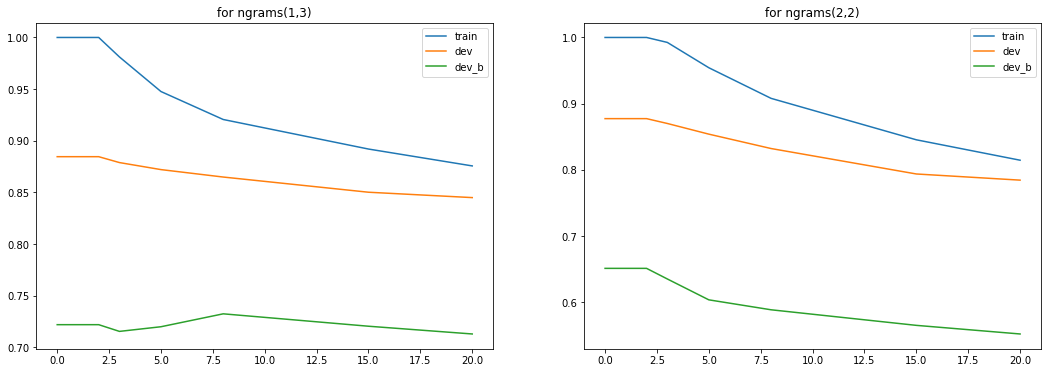

In [53]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(min_cnt,train_accuracy,label='train')
plt.plot(min_cnt,dev_accuracy,label='dev')
plt.plot(min_cnt,dev_b_accuracy,label='dev_b')
plt.legend()
plt.title('for ngrams(1,3)')
plt.subplot(1,2,2)
plt.plot(min_cnt,train_accuracy_bi,label='train')
plt.plot(min_cnt,dev_accuracy_bi,label='dev')
plt.plot(min_cnt,dev_b_accuracy_bi,label='dev_b')
plt.legend()
plt.title('for ngrams(2,2)')

In [ ]:
#As we can see additional min_ct from one side improve dev_b results, but result on other data are decreased. 
#on bigrams min_cnt=2 has little bit improvements

In [54]:
all_preds_m,train_accuracy_m,dev_accuracy_m,dev_b_accuracy_m=func_for_plots(M,mult_pos,mult_neg,N=(1,4))
print('for bigramms')
all_preds_bi_m,train_accuracy_bi_m,dev_accuracy_bi_m,dev_b_accuracy_bi_m=func_for_plots(M,mult_pos_bi,mult_neg_bi,N=(2,2))



0it [00:00, ?it/s]

fit time:  273.9736828804016
predict time for train is:  86.74687242507935
predict time for dev is:  28.176718711853027
predict time for test is:  64.63358521461487
predict time for dev-b is:  0.47911763191223145
predict time for test-b is:  1.7384381294250488
1.0
0.8844
0.72




1it [07:39, 459.66s/it]

fit time:  47.28224420547485
predict time for train is:  80.68605971336365
predict time for dev is:  23.335771083831787
predict time for test is:  55.38623905181885
predict time for dev-b is:  0.40874314308166504
predict time for test-b is:  3.0802927017211914
1.0
0.8844
0.72




2it [11:11, 385.43s/it]

fit time:  4.857954502105713
predict time for train is:  35.48243045806885
predict time for dev is:  21.174246072769165
predict time for test is:  51.25528025627136
predict time for dev-b is:  0.3902466297149658
predict time for test-b is:  1.7752645015716553
0.9833333333333333
0.8814
0.7185




3it [13:07, 304.35s/it]

fit time:  1.120131492614746
predict time for train is:  30.256955862045288
predict time for dev is:  19.675349712371826
predict time for test is:  49.28154158592224
predict time for dev-b is:  0.4584202766418457
predict time for test-b is:  1.6113903522491455
0.9528666666666666
0.8777
0.7135




4it [14:49, 243.84s/it]

fit time:  0.9528994560241699
predict time for train is:  33.626827239990234
predict time for dev is:  20.72920036315918
predict time for test is:  45.606186389923096
predict time for dev-b is:  0.33608317375183105
predict time for test-b is:  1.349336862564087
0.9278
0.8682
0.7275




5it [16:32, 201.53s/it]

fit time:  0.48754024505615234
predict time for train is:  26.570739030838013
predict time for dev is:  16.781212329864502
predict time for test is:  44.949384927749634
predict time for dev-b is:  0.29906773567199707
predict time for test-b is:  1.2893240451812744
0.8984
0.8509
0.7165




6it [18:03, 168.25s/it]

fit time:  0.5221281051635742
predict time for train is:  28.488205194473267
predict time for dev is:  18.680216550827026
predict time for test is:  41.846601247787476
predict time for dev-b is:  0.3481590747833252
predict time for test-b is:  1.1852991580963135
0.884
0.8453
0.712




7it [19:34, 145.24s/it]

for bigramms




0it [00:00, ?it/s]

fit time:  14.522407054901123
predict time for train is:  22.417676210403442
predict time for dev is:  7.365908861160278
predict time for test is:  18.600708484649658
predict time for dev-b is:  0.13002514839172363
predict time for test-b is:  0.5611352920532227
0.9998666666666667
0.8781
0.647




1it [01:03, 63.81s/it]

fit time:  10.800151348114014
predict time for train is:  21.011313676834106
predict time for dev is:  7.535058975219727
predict time for test is:  18.869067430496216
predict time for dev-b is:  0.12615489959716797
predict time for test-b is:  0.6358489990234375
0.9998666666666667
0.8781
0.647




2it [02:04, 62.80s/it]

fit time:  2.8072307109832764
predict time for train is:  9.597431421279907
predict time for dev is:  6.149550676345825
predict time for test is:  13.932516813278198
predict time for dev-b is:  0.10402655601501465
predict time for test-b is:  0.39009547233581543
0.9937333333333334
0.8706
0.6285




3it [02:37, 53.93s/it]

fit time:  0.8808140754699707
predict time for train is:  6.985927104949951
predict time for dev is:  4.503138780593872
predict time for test is:  9.95652437210083
predict time for dev-b is:  0.06401228904724121
predict time for test-b is:  0.8570687770843506
0.9584
0.8551
0.6




4it [03:00, 44.75s/it]

fit time:  0.30692434310913086
predict time for train is:  5.199499845504761
predict time for dev is:  3.3759984970092773
predict time for test is:  9.004366397857666
predict time for dev-b is:  0.06801700592041016
predict time for test-b is:  0.3030729293823242
0.9140666666666667
0.8373
0.5825




5it [03:19, 36.83s/it]

fit time:  0.30507612228393555
predict time for train is:  3.7709524631500244
predict time for dev is:  2.398603916168213
predict time for test is:  5.775455951690674
predict time for dev-b is:  0.05701732635498047
predict time for test-b is:  2.0268023014068604
0.8496
0.8017
0.5595




6it [03:34, 30.35s/it]

fit time:  0.17014670372009277
predict time for train is:  3.8097987174987793
predict time for dev is:  2.3866028785705566
predict time for test is:  4.995260715484619
predict time for dev-b is:  0.042005300521850586
predict time for test-b is:  0.25403499603271484
0.8235333333333333
0.789
0.555




7it [03:46, 24.83s/it]

Text(0.5, 1.0, 'for ngrams(2,2)')

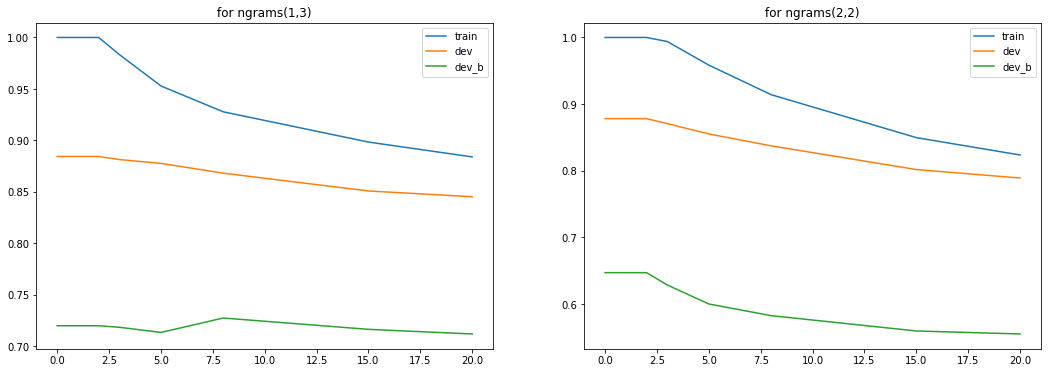

In [55]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(min_cnt,train_accuracy_m,label='train')
plt.plot(min_cnt,dev_accuracy_m,label='dev')
plt.plot(min_cnt,dev_b_accuracy_m,label='dev_b')
plt.legend()
plt.title('for ngrams(1,3)')
plt.subplot(1,2,2)
plt.plot(min_cnt,train_accuracy_bi_m,label='train')
plt.plot(min_cnt,dev_accuracy_bi_m,label='dev')
plt.plot(min_cnt,dev_b_accuracy_bi_m,label='dev_b')
plt.legend()
plt.title('for ngrams(2,2)')

In [89]:
result=to_df(all_preds[4])
result.to_csv('file.tsv',index=False,header=False,sep='\t')




0it [00:00, ?it/s]


1it [00:04,  4.04s/it]


2it [00:50, 16.61s/it]


3it [00:56, 13.49s/it]


4it [00:56,  9.56s/it]


5it [00:57,  7.09s/it]

In [ ]:
#As we can see additional min_ct from one side improve dev_b results, but result on other data are decreased. 
#on bigrams min_cnt=2 has little bit improvements

2. Multinomial Naive Bayes classifier may take (or not) into account word frequencies (by keeping or deleting words that occur more than once). How does it affect the results?

3. Preprocessing is crucial for the model performance. Try different methods: lowercase, punctuation deletion, replacing numbers with the **NUMBER** token. How do those methods affect the results?

In [ ]:
# it was tested lowercase and punctuation deletion, it's improve quality. because punctuation appear very often that's why 
#it can add additional unusefull information. as for lower letters it's also improve because if do not do it classifier 
# account same words but with 1 big letter and other with low letter as different words
# also I see that if I delete figures, accuracy in dev get lower, then if I made calculation with 

4. Some words in the test set do not appear in the dictionaries. However, they may also be a good indicator (for instance, a lot of unknown words in a email is a good feature for spam detection). Try to replace unknown words with **UNK** token. How do we estimate $P( UNK |c_j )$ then? 

_Hint: we get this by replacing words that occur only once in the training set with this token._

5. Check the relation between the document length and the class label. Draw the distribution of document lengths for each class. Is it useful to take the length into account? 

In [56]:

neg_length=[]
pos_length=[]
for i,j in zip(negative_words,positive_words):
    neg_length.append(len(i))
    pos_length.append(len(j))

C:\Users\nikos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


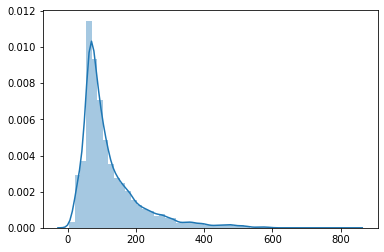

In [57]:
#distribution for negative reviews
sns.distplot(neg_length);

C:\Users\nikos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


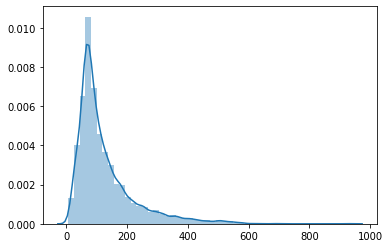

In [58]:
#distribution for positive reviews
sns.distplot(pos_length);

In [ ]:
# from one side sentence length in positive and negative review can be feature, but in our case we have almost  same distribution
# exception that in positive reviews we have bigger outliers to 1000 words instead to 800 in negative

6. Apart from the reviews, there are many unlabeled texts (file *train\_unlabeled.texts*) -- try to use them to improve classifier performance. Suggest your own ideas, how to use the data. Implement and compare the approaches that seem to you to be more prospective.